# Uploading Files to DataverseNL using PyDataverse API
---
*Author: [Pedro V Hernandez Serrano](https://github.com/pedrohserrano)*  
*Last edit: 14/04/22*  
*Expected completion time: 20-40 mins*  

    License: MIT

---

**WELCOME!** 🤚

The following notebook will walk you through the upload process of files to DataverseNL. It is convenient when it comes to uploading many files at once or big datasets, given the DataverseNL user interface limitations.

> **IMPORTANT: It is expected that the user has already created a dataset entry in DataverseNL, filling all Metadata elements**

If you are not familiar with Colab Notebooks or Python is no problem. The only thing you need to do is carefully follow this notebook's instructions step by step.

For more experienced people, please take a look at the original documentation of [PyDataverse](https://pydataverse.readthedocs.io/) a pythonic implementation of the Dataverse API, on which this notebook is based.

**Requisites to continue:**  
+ File(s) that you want to upload to DataverseNL
+ Google Drive account
+ Google Chrome browser
+ Having a dataset entry created in the DataverseNL platform

---
## Step 1 - Getting Familiar with Colab Notebooks

Colab Notebooks allows you to write and execute Python in your browser, without any installation requirement, computation free of charge, and you can easily share. It works just like *Google Docs*

Colab Notebooks contain code cells. Each code cell contains Python code. Like the following   
1. Hover the cell below and click the play ▶️ button

In [ ]:
hello = 'Greetings from Python'

print(hello)

That's it! This is how you "run" Python code inside a Colab Notebook cell.

2. **IMPORTANT**: Before we start, please note that this is a public notebook which means that if you put sensitive information such as credentials or tokens in this very notebook will be visible to everyone. So, please create a copy of this notebook to your personal Google drive:

- In the upper left part of the notebook, you go to `File -> Save a copy in Drive`, and automatically, a copy of this notebook will be generated in your own Google Drive.

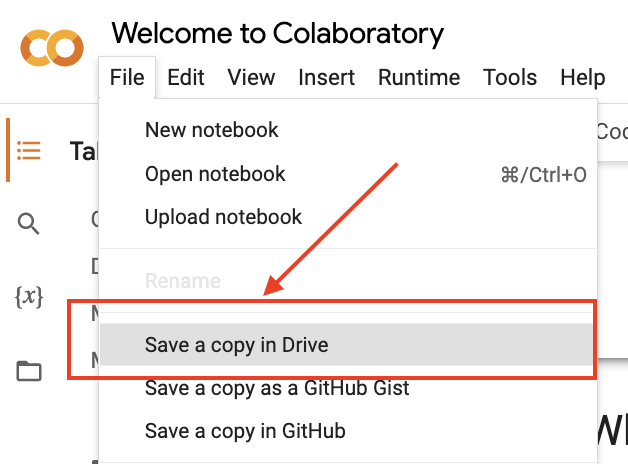

- Go to the copy and carry on to step 2

---
## Step 2 - Login to DataverseNL

1. Visit the Dataverse website https://demo.dataverse.nl/ 
2. By clicking on **login** (up-right), you will see the following page.

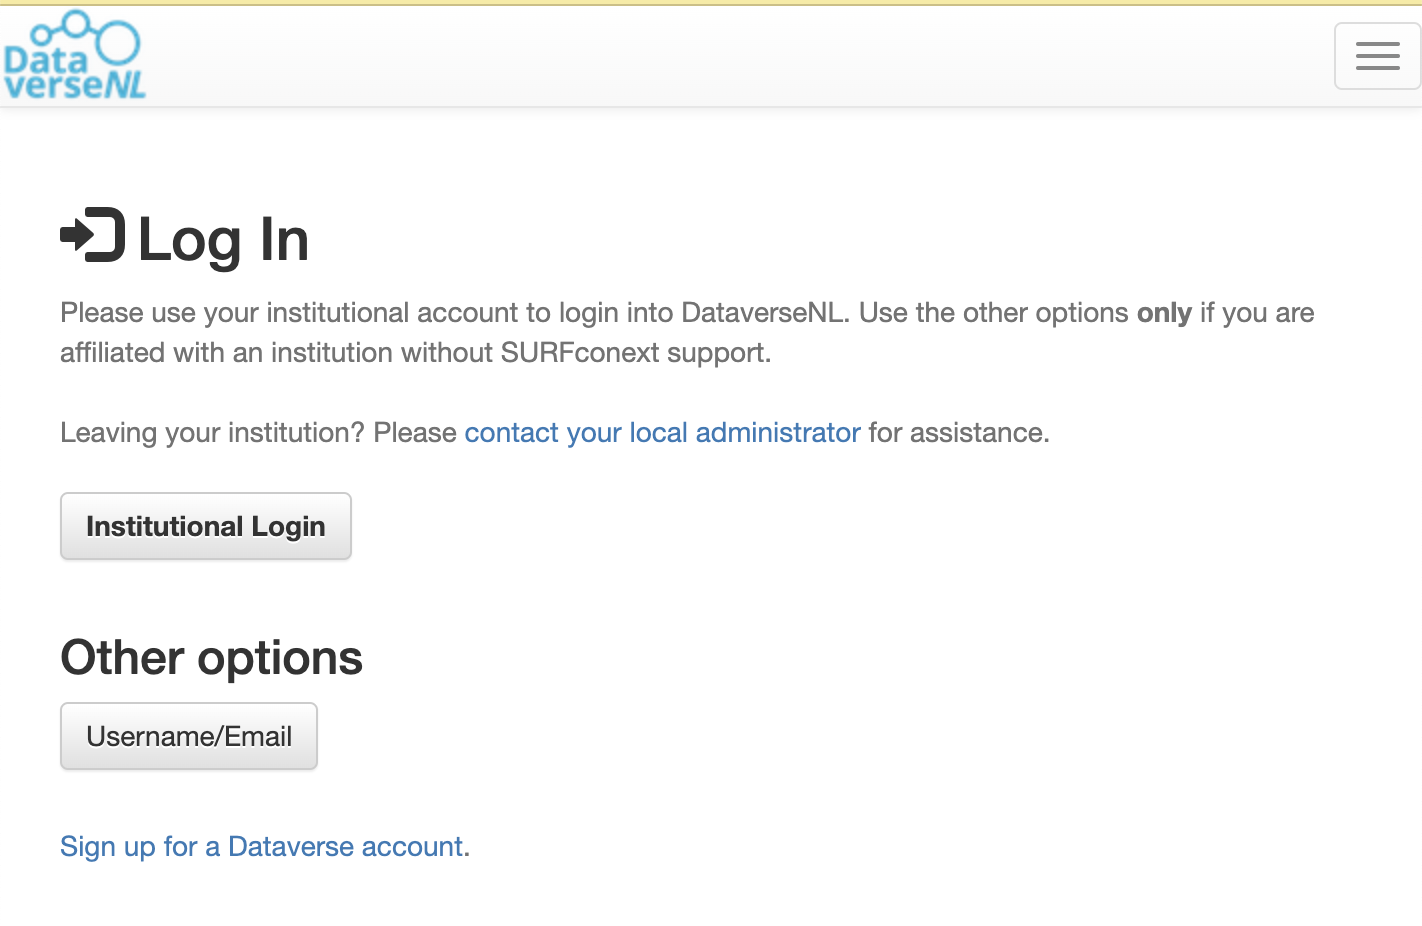

3. For all Dutch institutions it is possible to connect by Institutional login via SURF connect.
4. Log in to your account.


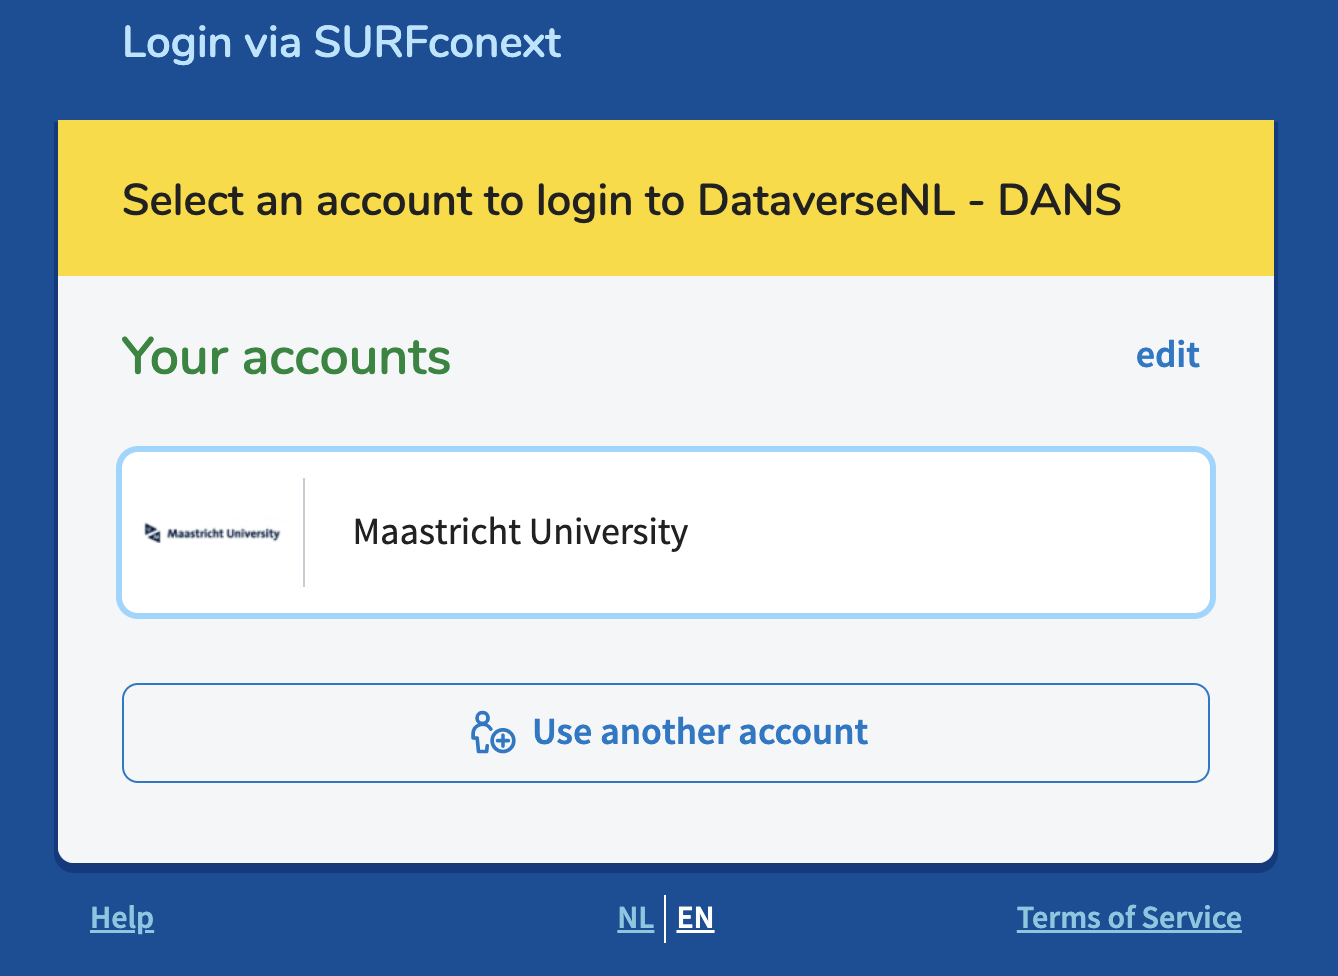

DataverseNL is Dutch implementation of Hardvard Dataverse maitained by [DANS](https://dans.knaw.nl/en/)


---

## Step 3 - Set up an API key

1. Once inside your account, you will be able to see your name on the top right-hand side. Click on it and select **API token**

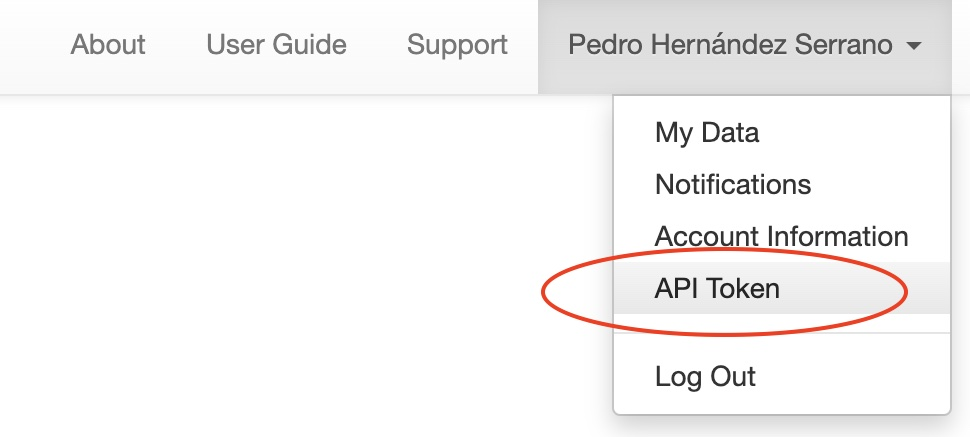

2. Click on the **API token** tab. (In case this is your first time, there will be a message `API Token for <user> has not been created`)
3. Click on **Create Token** 

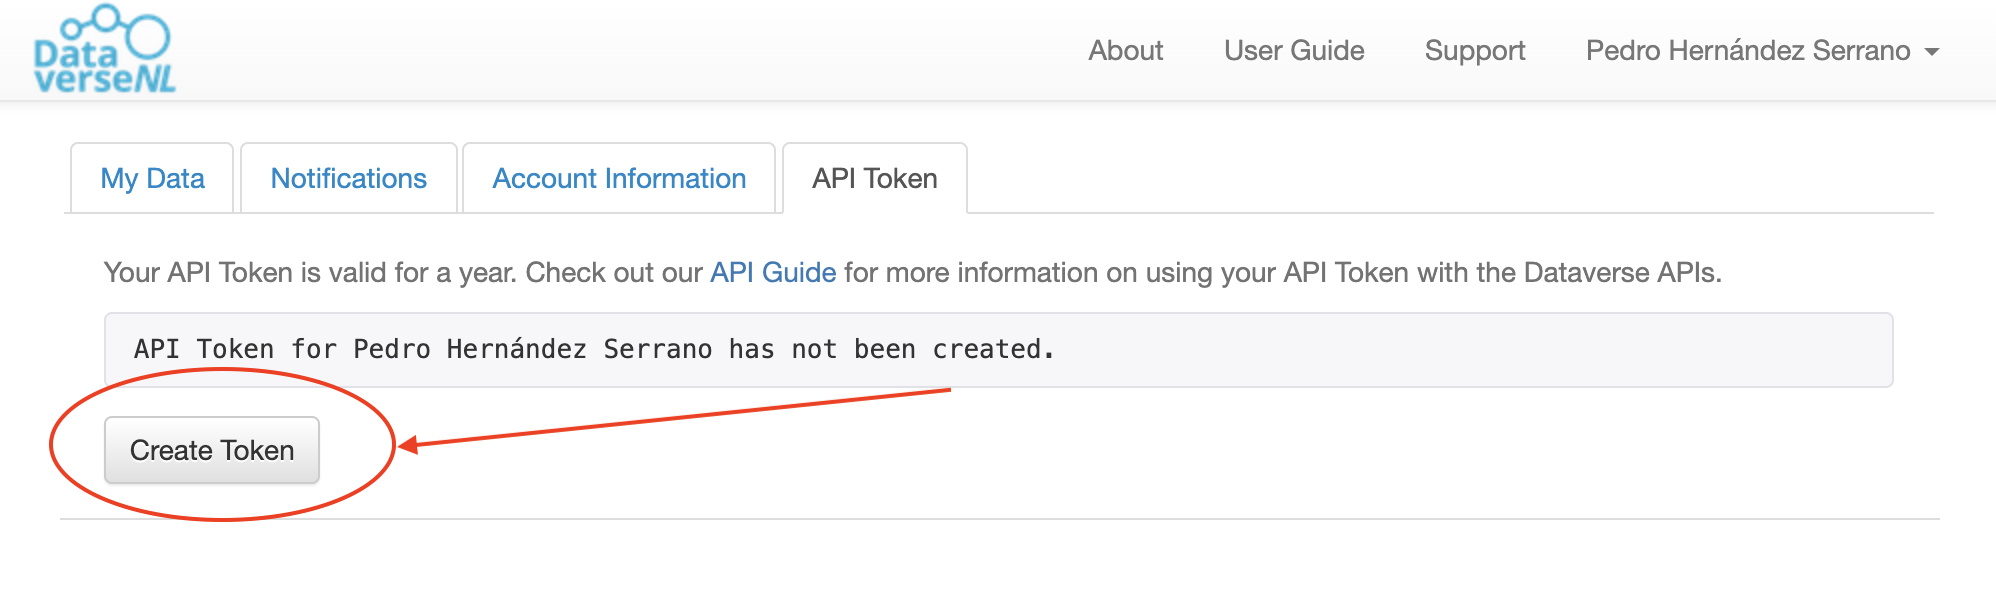

4. An alphanumerical token will be generated for you. Click on **Copy to Clipboard** to copy it.
5. Paste the **API token** in the following cell substituting the **XXXX (keep the quotation marks) `' '`**

Run the cell below: (click the ▶️ button)

In [ ]:
API_TOKEN = 'XXXX-XXXX-XXXX-XXXX-XXXX-XXXX'

---

## Step 4 - Allocate your Dataverse and DOI

1. Go back to the DataverseNL page and navigate to the dataverse where you want to put the data (e.g. Faculty of Science and Engineering)
2. Copy the URL once inside the dataverse. This URL is important because it contains the dataverse ID: `Maastricht-FSE` in this example.  

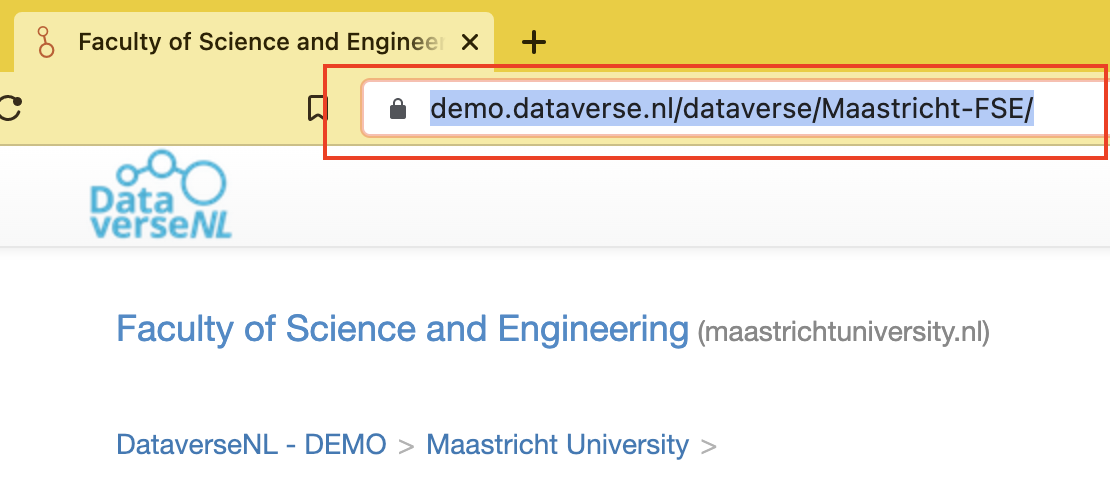

3. Paste this ID in the following cell substituting **XXXX (keep the quotation marks) `' '`**

Run the cell below: (click the ▶️ button)

In [ ]:
DATAVERSE = 'XXXX://XXXX.XXXX/XXXX/'

4. Go to the dataset that you have previously created. In case you have not created a dataset and its metadata, you can not continue. You have to go back create it first (here is a video instruction)
5. Once you click on your dataset entry, go to the **Metadata** tab, the first entry is the data persistent identifier **DOI (Digital Object Identifier)**

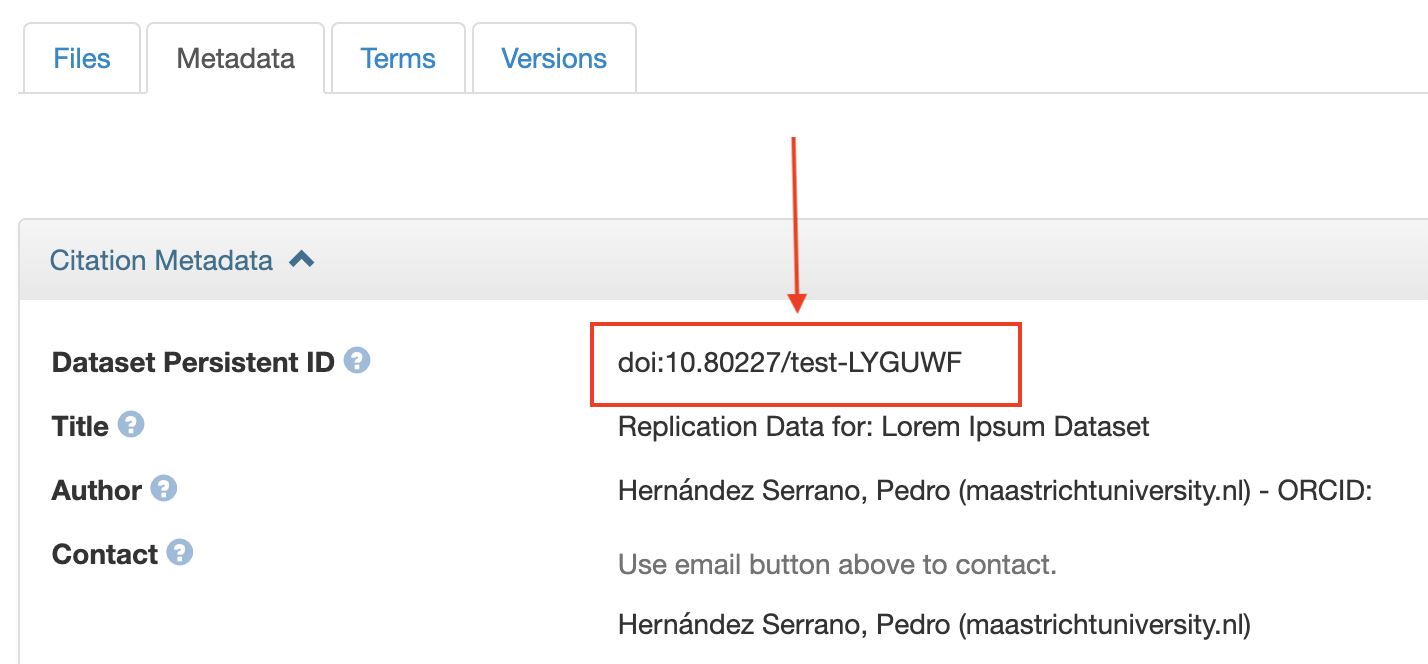


6. Copy this DOI and paste it into the cell below substituting **XXXX (keep the quotation marks) `' '`**

Run the cell below: (click the ▶️ button)

In [ ]:
DOI = 'doiXXXXXXXXXXXXXXXX'

---

## Step 5 - Connecting to DataverseNL API

1. The following code will install the `pyDataverse` library necessary for uploading the files.  

Run the cell below: (click the ▶️ button)

In [ ]:
!pip install -U pyDataverse

2. The following code is creating a remote connection between this Notebook and `DataverseNL`.  If it's succesful carry on to step 6.  

Run the cell below: (click the ▶️ button)

In [ ]:
from pyDataverse.api import NativeApi

BASE_URL = DATAVERSE.split('/dataverse/')[0]
DATAVERSE_ID = DATAVERSE.split('/dataverse/')[1]

api = NativeApi(BASE_URL, API_TOKEN)

resp = api.get_info_version()
if resp.json()['status'] == 'OK':
  print('Successful connection to DataverseNL API!!')

---

## Step 7 - Uploading the Data

1. The following code creates button that you can use to upload the files.   

    > **NOTE: THIS MIGHT TAKE A WHILE FOR BIG DATASETS**

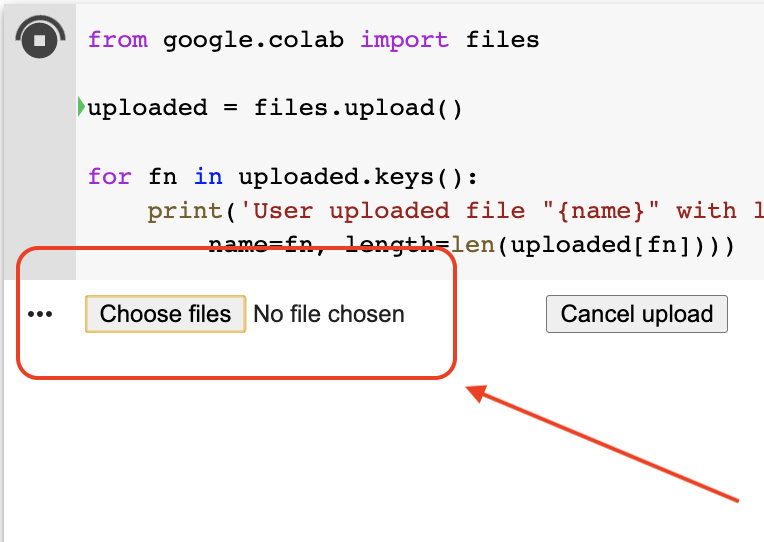


Run the cell below: (click the ▶️ button)

In [ ]:
from google.colab import files

uploaded = files.upload()

Once it is complete, you shall be able to see the files in this notebook folder by clicking on the folder icon on the left bar
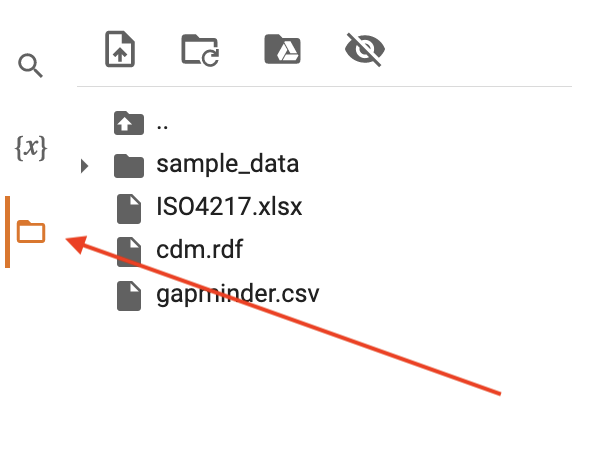

2. The following code transfers the files previously uploaded finally to DataverseNL.  
   > **NOTE: THIS MIGHT TAKE A WHILE FOR BIG DATASETS**

Run the cell below: (click the ▶️ button)

In [ ]:
from pyDataverse.models import Datafile

file_names = list(uploaded.keys())
for f in file_names:
  df = Datafile()
  df.set({"pid": DOI, "filename": f}) 
  resp = api.upload_datafile(DOI, f)
  print("File {} -> status: {}".format(f, resp.json()['status']))

---

## Success! 🎉🎉
You have successfully uploaded a chunk of data files to your dataset repository in DataverseNL

Didn't go so smooth?
Please feel free to contact or ask questions to: 
p.hernandezserrano@maastrichtuniversity.nl
